Project Title: IPL Analysis & Insights Dashboard

Project Type: Exploratory Data Analysis (EDA) | Business Intelligence | Sports Analytics

Prepared by: Ajay Bramhankar

C:\Users\ajayb\AppData\Local\Temp\ipykernel_31088\888925384.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="season", data=matches, palette="viridis")


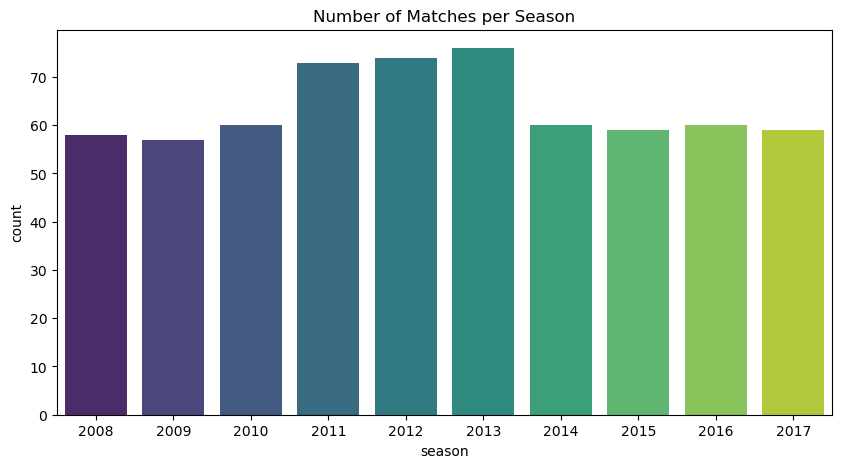

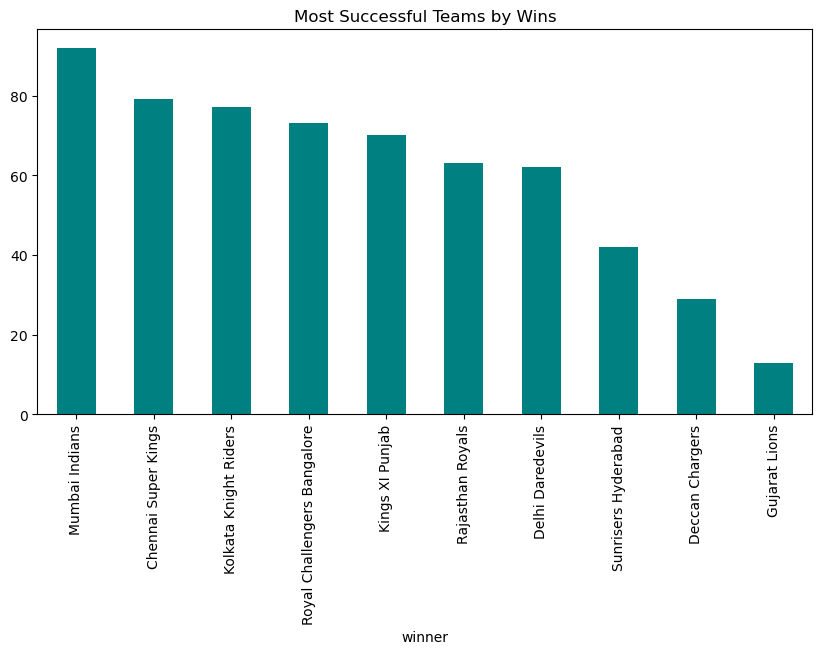

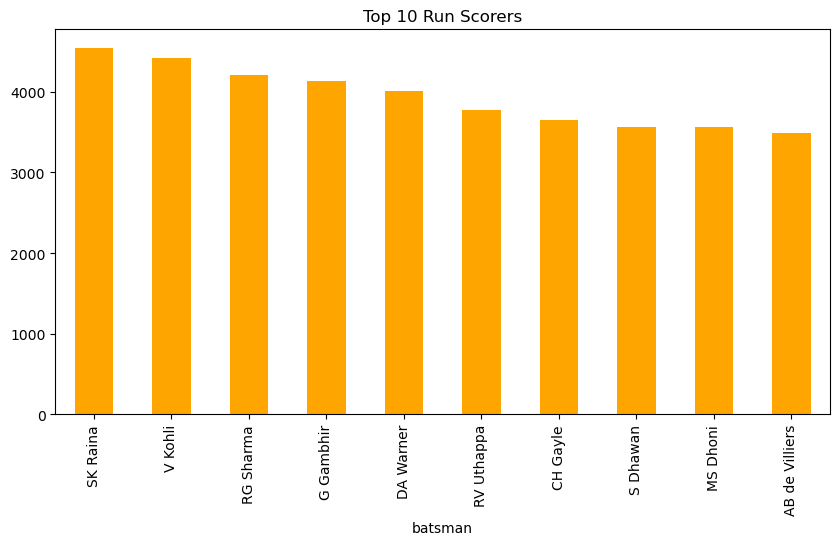

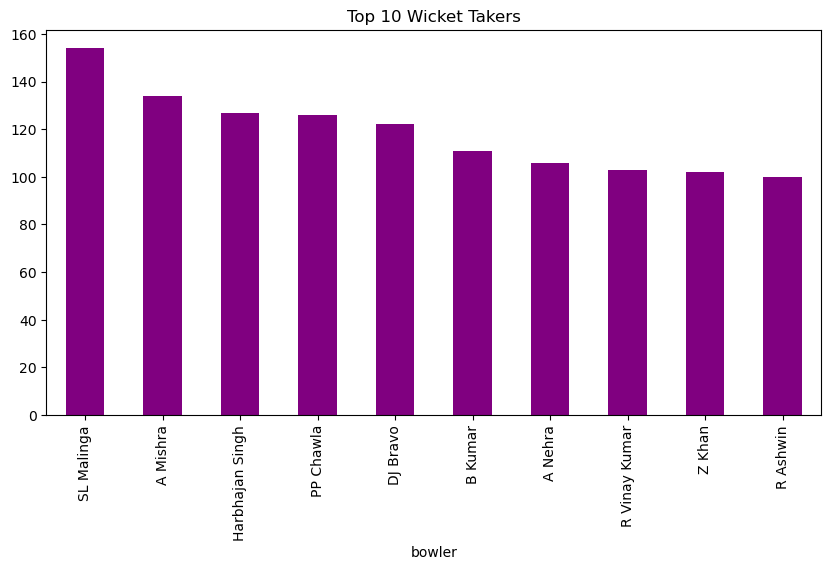

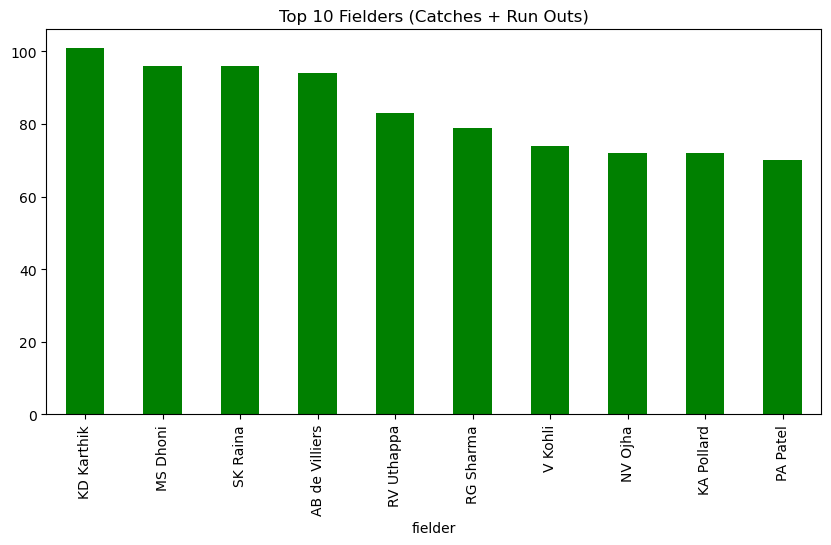

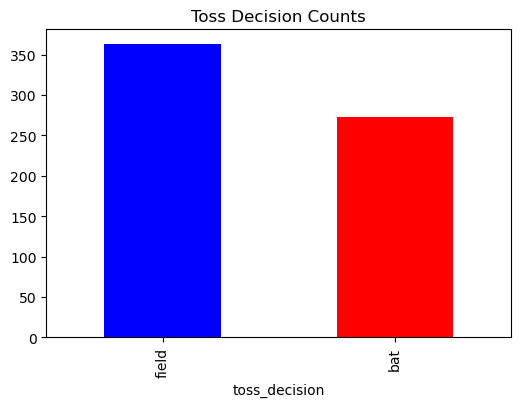

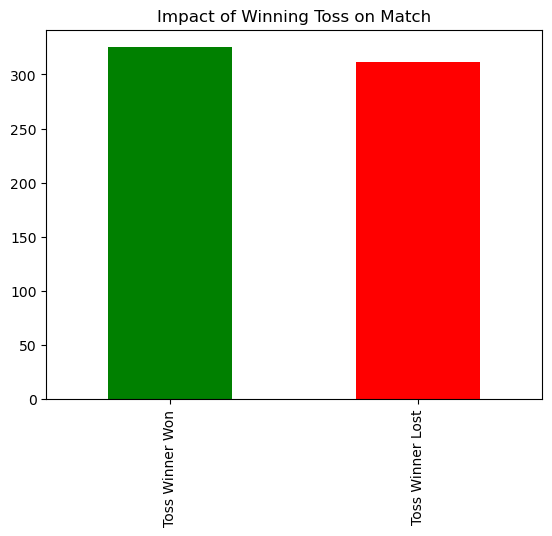

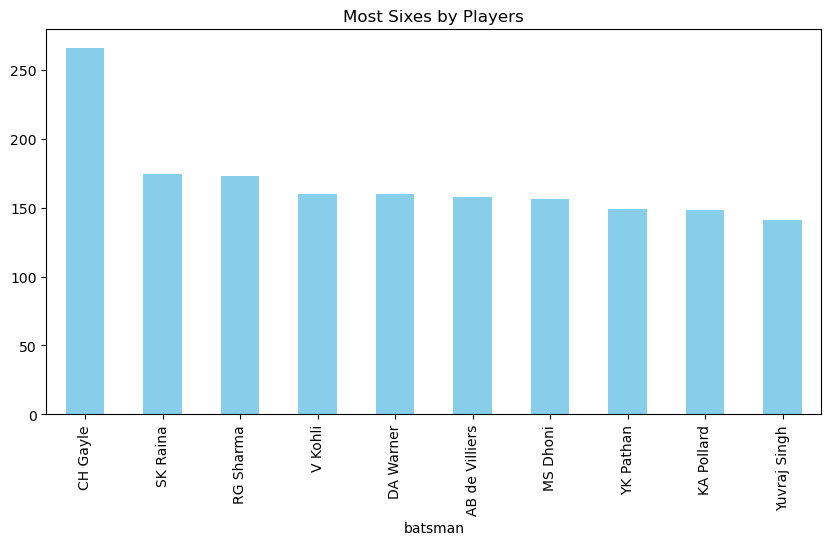

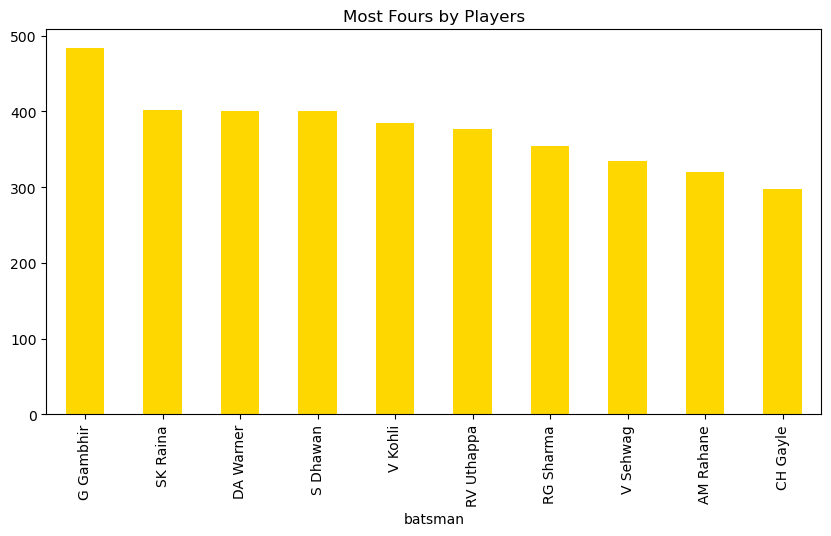

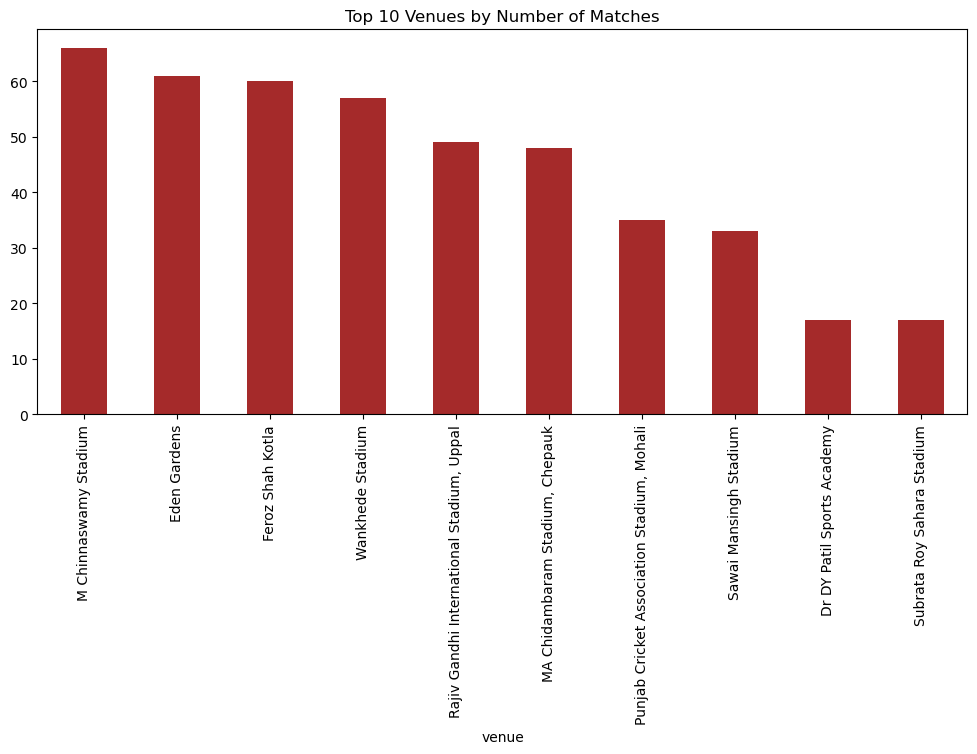


========== Key Analytical Answers ==========
Most Successful Teams:
 winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Name: count, dtype: int64

Top Run Scorers:
 batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

Top Wicket Takers:
 bowler
SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
B Kumar            111
A Nehra            106
R Vinay Kumar      103
Z Khan             102
R Ashwin           100
dtype: int64

Top Fielders:
 fielder
KD Karthik        101
MS Dhoni           96
SK Raina           96
AB de Villiers     94
RV Uthappa         83
RG Sharma          79
V Kohli   

In [7]:
# ================== IPL Analysis Full EDA ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Load Data ----------------
matches = pd.read_excel(r"C:\Users\ajayb\Downloads\matches (1).xlsx")
deliveries = pd.read_excel(r"C:\Users\ajayb\Downloads\deliveries.xlsx")

# Standardize column names
matches.columns = matches.columns.str.strip().str.lower()
deliveries.columns = deliveries.columns.str.strip().str.lower()

matches['date'] = pd.to_datetime(matches['date'], errors='coerce')

# ---------------- 1. Matches per Season ----------------
plt.figure(figsize=(10,5))
sns.countplot(x="season", data=matches, palette="viridis")
plt.title("Number of Matches per Season")
plt.show()

# ---------------- 2. Most Successful Teams ----------------
team_wins = matches['winner'].value_counts()
team_wins.head(10).plot(kind="bar", figsize=(10,5), color="teal")
plt.title("Most Successful Teams by Wins")
plt.show()

# ---------------- 3. Top Run Scorers ----------------
runs_by_batsman = deliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)
runs_by_batsman.plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Top 10 Run Scorers")
plt.show()

# ---------------- 4. Top Wicket Takers ----------------
bowler_dismissals = ["bowled","caught","lbw","stumped","caught and bowled","hit wicket"]
wickets = deliveries[deliveries["dismissal_kind"].isin(bowler_dismissals)]
wickets_by_bowler = wickets.groupby("bowler").size().sort_values(ascending=False).head(10)
wickets_by_bowler.plot(kind="bar", figsize=(10,5), color="purple")
plt.title("Top 10 Wicket Takers")
plt.show()

# ---------------- 5. Top Fielders ----------------
field_df = deliveries[deliveries["dismissal_kind"].isin(["caught","run out"]) & deliveries["fielder"].notna()]
field_contrib = field_df.groupby("fielder").size().sort_values(ascending=False).head(10)
field_contrib.plot(kind="bar", figsize=(10,5), color="green")
plt.title("Top 10 Fielders (Catches + Run Outs)")
plt.show()

# ---------------- 6. Toss Decisions ----------------
toss_decision_counts = matches["toss_decision"].value_counts()
toss_decision_counts.plot(kind="bar", figsize=(6,4), color=["blue","red"])
plt.title("Toss Decision Counts")
plt.show()

# ---------------- 7. Toss Impact on Match ----------------
toss_result = matches.assign(toss_win_match_win=(matches["toss_winner"]==matches["winner"]))
toss_win_counts = toss_result["toss_win_match_win"].value_counts()
toss_win_counts.index = ["Toss Winner Won","Toss Winner Lost"]
toss_win_counts.plot(kind="bar", color=["green","red"])
plt.title("Impact of Winning Toss on Match")
plt.show()

# ---------------- 8. Most Sixes by Players ----------------
sixes_by_player = deliveries[deliveries["batsman_runs"]==6].groupby("batsman").size().sort_values(ascending=False).head(10)
sixes_by_player.plot(kind="bar", figsize=(10,5), color="skyblue")
plt.title("Most Sixes by Players")
plt.show()

# ---------------- 9. Most Fours by Players ----------------
fours_by_player = deliveries[deliveries["batsman_runs"]==4].groupby("batsman").size().sort_values(ascending=False).head(10)
fours_by_player.plot(kind="bar", figsize=(10,5), color="gold")
plt.title("Most Fours by Players")
plt.show()

# ---------------- 10. Matches by Venue ----------------
matches_by_venue = matches["venue"].value_counts().head(10)
matches_by_venue.plot(kind="bar", figsize=(12,5), color="brown")
plt.title("Top 10 Venues by Number of Matches")
plt.show()

# ---------------- Key Insights ----------------
print("\n========== Key Analytical Answers ==========")
print("Most Successful Teams:\n", team_wins.head(5))
print("\nTop Run Scorers:\n", runs_by_batsman)
print("\nTop Wicket Takers:\n", wickets_by_bowler)
print("\nTop Fielders:\n", field_contrib)
print("\nToss Decision Counts:\n", toss_decision_counts)
print("\nImpact of Toss:\n", toss_win_counts)
print("\nMost Sixes by Players:\n", sixes_by_player)
print("\nMost Fours by Players:\n", fours_by_player)
print("\nMatches by Venue:\n", matches_by_venue)

# Example Lucky Stadium for most successful team
top_team = team_wins.index[0]
involved = matches[(matches["team1"]==top_team)|(matches["team2"]==top_team)].copy()
involved["won"] = (involved["winner"]==top_team).astype(int)
venue_summary = involved.groupby("venue").agg(matches=("venue","size"), wins=("won","sum"))
venue_summary["win%"] = (venue_summary["wins"]/venue_summary["matches"]*100).round(2)
print(f"\nLucky Stadium for {top_team}:\n", venue_summary.sort_values("win%",ascending=False).head(1))
